In [23]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns',None)

In [24]:
df = pd.read_csv('processed_data_Ideaspice.csv')

In [25]:
df.head()

,Unnamed: 0,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,0,2,2,2,3,7,1,40,0,3,4,2,2,129,97,6287,4984,1,23,4,1,3,1,1,1,1,2
1,1,1,1,1,2,2,7,0,46,0,4,4,3,2,134,64,4866,24079,9,18,3,2,3,8,7,7,7,23
2,2,0,2,2,1,3,5,1,49,0,3,4,3,4,934,82,19833,25706,5,14,3,2,4,5,5,0,5,13
3,3,1,1,2,1,1,0,0,29,0,5,4,3,3,1201,32,7854,3642,1,19,3,3,2,1,1,1,1,13
4,4,0,1,2,1,3,5,0,54,0,3,1,1,4,1478,42,18731,13254,2,13,3,3,3,2,2,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               1470 non-null   int64
 1   Gender                   1470 non-null   int64
 2   MaritalStatus            1470 non-null   int64
 3   Travelling               1470 non-null   int64
 4   Vertical                 1470 non-null   int64
 5   Education                1470 non-null   int64
 6   Role                     1470 non-null   int64
 7   OverTime                 1470 non-null   int64
 8   Age                      1470 non-null   int64
 9   Turnover                 1470 non-null   int64
 10  Qualifications           1470 non-null   int64
 11  Satisfaction             1470 non-null   int64
 12  Engagement               1470 non-null   int64
 13  Level                    1470 non-null   int64
 14  Daily                    1470 non-null   int64
 15  Hour

In [27]:
df.drop(columns='Unnamed: 0',inplace=True)

### selecting feature for scaling 

In [28]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


In [29]:
cont_features = []
num_cat_features =[]
for feature in num_features:
    if df[feature].nunique() > 10 :
        cont_features.append(feature)
    else:
        num_cat_features.append(feature)
print(cont_features)


['Age', 'Daily', 'Hour', 'Monthly', 'MonthlyRate', 'SalaryHike', 'DistanceFromHome']


In [30]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df[cont_features])

StandardScaler()

In [31]:
# transform 
df = pd.concat([df[num_cat_features].reset_index(drop=True),
                    pd.DataFrame(scale.transform(df[cont_features]), columns=cont_features)],
                    axis=1)

In [32]:
df.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Turnover,Qualifications,Satisfaction,Engagement,Level,Work Experience,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,Age,Daily,Hour,Monthly,MonthlyRate,SalaryHike,DistanceFromHome
0,0,2,2,2,3,7,1,0,3,4,2,2,1,4,1,3,1,1,1,1,0.308288,-1.487720,1.549964,-0.090531,-1.332782,2.064153,-0.892559
1,1,1,1,2,2,7,0,0,4,4,3,2,9,3,2,3,8,7,7,7,0.938585,-1.475988,-0.052183,-0.367020,1.330416,0.754004,1.682756
2,0,2,2,1,3,5,1,0,3,4,3,4,5,3,2,4,5,5,0,5,1.253734,0.401122,0.821715,2.545160,1.557335,-0.294115,0.456415
3,1,1,2,1,1,0,0,0,5,4,3,3,1,3,3,2,1,1,1,1,-0.847256,1.027608,-1.605779,0.214365,-1.519952,1.016034,0.456415
4,0,1,2,1,3,5,0,0,3,1,1,4,2,3,3,3,2,2,0,1,1.778981,1.677557,-1.120281,2.330740,-0.179357,-0.556145,-1.015193


In [33]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt 
import seaborn as sns 

In [34]:
X = df.drop(columns='Turnover')

In [35]:
Y = df['Turnover']

In [36]:
X.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Qualifications,Satisfaction,Engagement,Level,Work Experience,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,Age,Daily,Hour,Monthly,MonthlyRate,SalaryHike,DistanceFromHome
0,0,2,2,2,3,7,1,3,4,2,2,1,4,1,3,1,1,1,1,0.308288,-1.487720,1.549964,-0.090531,-1.332782,2.064153,-0.892559
1,1,1,1,2,2,7,0,4,4,3,2,9,3,2,3,8,7,7,7,0.938585,-1.475988,-0.052183,-0.367020,1.330416,0.754004,1.682756
2,0,2,2,1,3,5,1,3,4,3,4,5,3,2,4,5,5,0,5,1.253734,0.401122,0.821715,2.545160,1.557335,-0.294115,0.456415
3,1,1,2,1,1,0,0,5,4,3,3,1,3,3,2,1,1,1,1,-0.847256,1.027608,-1.605779,0.214365,-1.519952,1.016034,0.456415
4,0,1,2,1,3,5,0,3,1,1,4,2,3,3,3,2,2,0,1,1.778981,1.677557,-1.120281,2.330740,-0.179357,-0.556145,-1.015193


<Axes: >

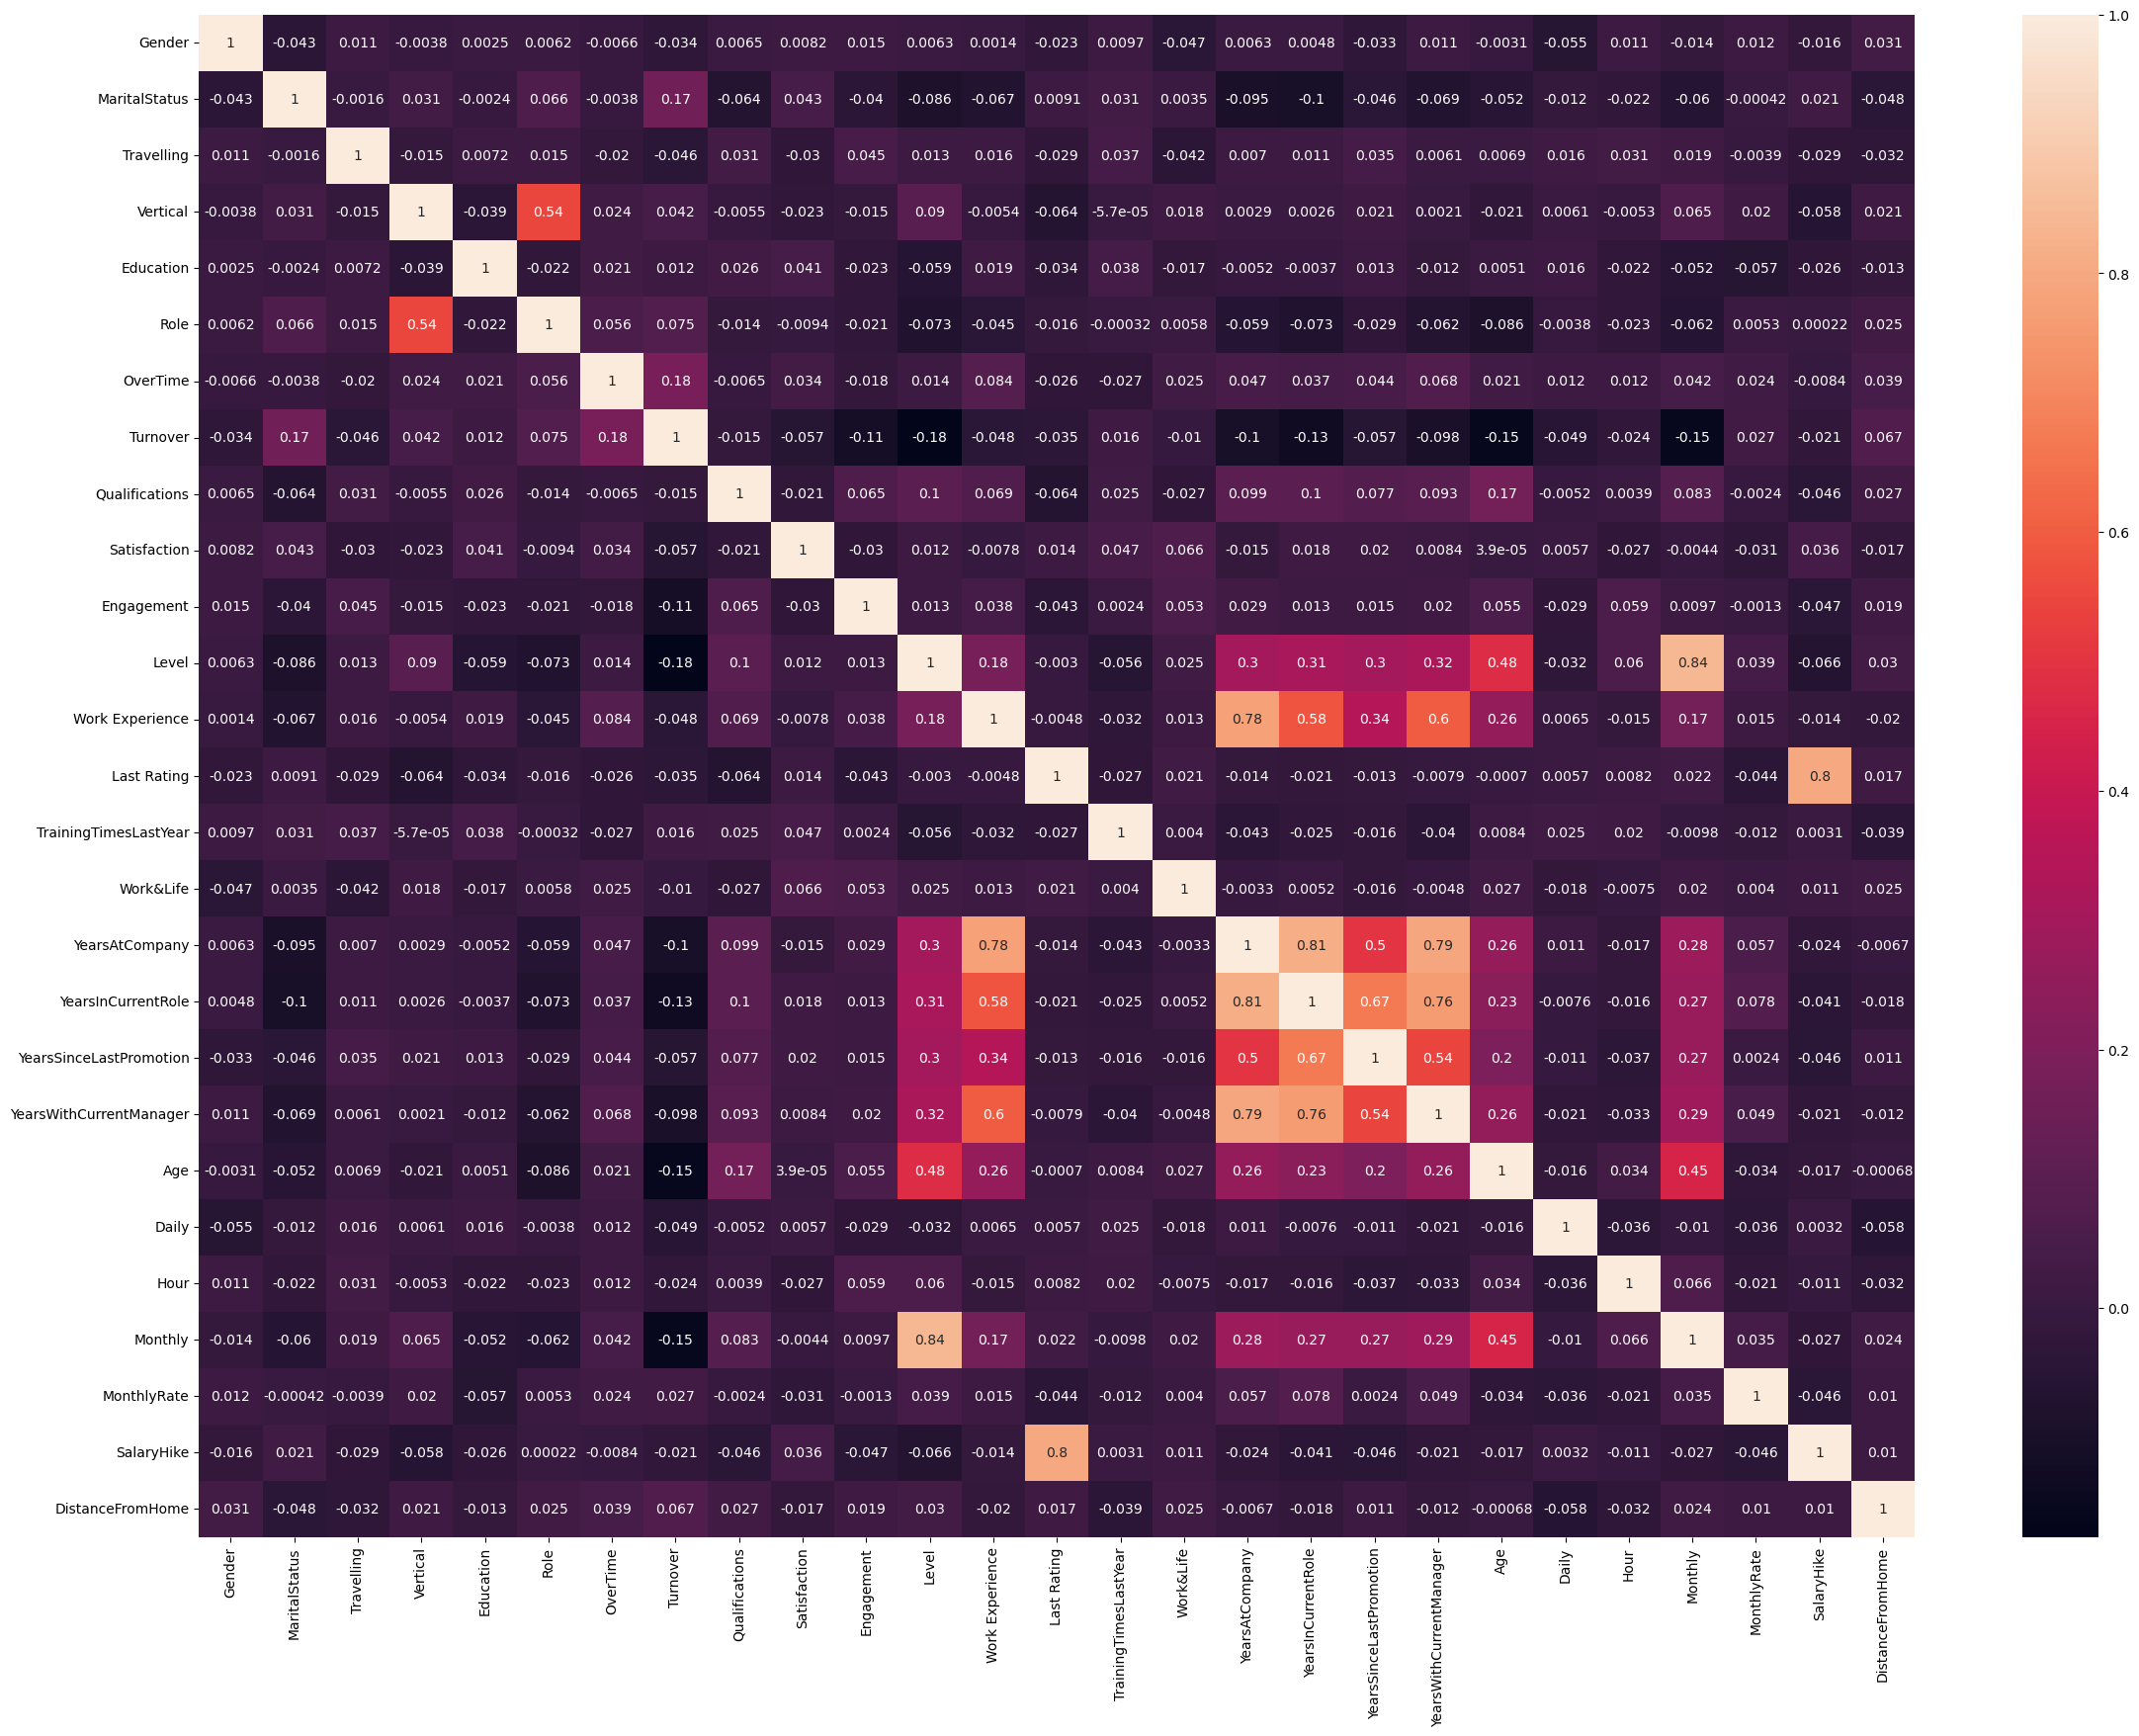

In [37]:
plt.figure(figsize = (28,20))
sns.heatmap(df.corr(), annot=True)

### Feature selection


In [38]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X,Y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [39]:
feature_sel_model.get_support()

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True])

In [40]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 26
selected features: 19


In [41]:
selected_feat

Index(['Gender', 'MaritalStatus', 'Travelling', 'Role', 'OverTime',
       'Qualifications', 'Satisfaction', 'Engagement', 'Level',
       'Work Experience', 'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Age', 'Daily', 'Monthly', 'MonthlyRate',
       'SalaryHike', 'DistanceFromHome'],
      dtype='object')

In [42]:
df[selected_feat].head()

,Gender,MaritalStatus,Travelling,Role,OverTime,Qualifications,Satisfaction,Engagement,Level,Work Experience,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,Age,Daily,Monthly,MonthlyRate,SalaryHike,DistanceFromHome
0,0,2,2,7,1,3,4,2,2,1,1,1,1,0.308288,-1.487720,-0.090531,-1.332782,2.064153,-0.892559
1,1,1,1,7,0,4,4,3,2,9,2,7,7,0.938585,-1.475988,-0.367020,1.330416,0.754004,1.682756
2,0,2,2,5,1,3,4,3,4,5,2,5,0,1.253734,0.401122,2.545160,1.557335,-0.294115,0.456415
3,1,1,2,0,0,5,4,3,3,1,3,1,1,-0.847256,1.027608,0.214365,-1.519952,1.016034,0.456415
4,0,1,2,5,0,3,1,1,4,2,3,2,0,1.778981,1.677557,2.330740,-0.179357,-0.556145,-1.015193


In [43]:
X_train = df[selected_feat]

In [45]:
X_train.to_csv('model_data.csv')